<a href="https://colab.research.google.com/github/hgreatrex/GoogleCollabTutorial_Geovista/blob/main/20230128_DeepAnalog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://prosecco.geog.psu.edu/data/20230128_WorkshopML/PAnEn.png)

# Analog Ensemble and Deep Analogs for Quantitative Precipitation Forecasting

_Presenter: [Weiming Hu](https://weiming-hu.github.io/)_

This tutorial is created for the workshop, Envisioning the Future of Machine and GIS. See the schedule of the workshop [here](https://prosecco.geog.psu.edu/GEOvista/2023_ML-GIS/).

In this tutorial, you are going to learn:
1. Interacting with command lines and Python all from within Jupyter interface
2. Basic data loading and visualization with `xarray` and `matplotlib`
3. Basic weather verification with `PyAnEn`
4. Building `PAnEn` and its components from source
5. Generating predictions with AnEn and Deep Analogs

References

> 1. Weiming Hu, Guido Cervone, Laura Clemente-Harding, and Martina Calovi. (2019). Parallel Analog Ensemble. Zenodo. http://doi.org/10.5281/zenodo.3384321
> 2. Hu, W., Vento, D. and Su, S., 2021. Parallel analog ensemble-the power of weather analogs. In Proceedings of the 2020 Improving Scientific Software Conference (pp. 1-14).
> 3. Hu, W., Cervone, G., Young, G. and Delle Monache, L., 2023. Machine Learning Weather Analogs for Near-Surface Variables. Boundary-Layer Meteorology, pp.1-25.


## Environment Setup

First, let's set up the environment on the virtual machine.

### Install Base Environment

`mamba` is a drop-in replacement for `conda` with C implementation. It provides faster processing speed than `conda` and it is what we are using here today.

In [ ]:
# Run this block by itself first.
# This will lead to a kernel restart, so don't be alarm by the session crashing.
#

!pip install -q condacolab

import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...


In [ ]:
!mamba install -c conda-forge -y xarray matplotlib cartopy geopandas


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.0.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['xarray', 'matplotlib', 'cartopy', 'geopandas']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-

### Install PAnEn with Torch Support

Since `PAnEn` is implemented in C++, we need to build it from source. If you are running this on your personal devices, you can check out the pre-built images with `docker` and `singularity`. See instructions [here](https://weiming-hu.github.io/AnalogsEnsemble/doc#DockerSingularity).

Notice that, whenever we prefix the command with an exclamation mark, `!`, we are executing command lines.

In [ ]:
# Install dependency
!mamba install -c anaconda cmake boost -y
!mamba install -c conda-forge netcdf-cxx4 eccodes doxygen -y

# Get LibTorch
!wget https://download.pytorch.org/libtorch/cpu/libtorch-cxx11-abi-shared-with-deps-1.13.1%2Bcpu.zip

# Unzip
!unzip libtorch-cxx11-abi-shared-with-deps-1.13.1+cpu.zip

# Get PAnEn source files
!wget https://github.com/Weiming-Hu/AnalogsEnsemble/archive/master.zip

# Unzip
!unzip master.zip

# Create a separate folder to store all intermediate files during the installation process
%cd AnalogsEnsemble-master/
!mkdir build
%cd build
!cmake -DENABLE_AI=ON \
    -DBUILD_PYGRID=ON \
    -DBUILD_SHARED_LIBS=ON \
    -DCMAKE_PREFIX_PATH="/content/libtorch" \
    -DCMAKE_INSTALL_RPATH="/content/libtorch/lib" \
    -DPYTHON_EXECUTABLE="/usr/local/bin/python3" ..

# Compile
!make -j 2

# Install
!make install

In [ ]:
# If this runs correctly, the PAnEn is successful!
# Also make sure it has the argument: --ai-similarity arg
#
!anen_netcdf

In [ ]:
!PYTHONPATH="/content/AnalogsEnsemble-master/build/CGrid/" python -c "from AnEnGrid import AnEnGrid; print('AnEnGrid found!')"

AnEnGrid found!


### Install PyAnEn and DeepAnalogs

[PyAnEn](https://github.com/Weiming-Hu/PyAnEn) is an extension Python module that contains various methods for file I/O and verification.

[Deep Analogs](https://github.com/Weiming-Hu/DeepAnalogs) is the module we are going to use for training Machine Learning metrics for generating Analog Ensembles.

In [ ]:
!pip install git+https://github.com/Weiming-Hu/PyAnEn.git

In [ ]:
!pip install git+https://github.com/Weiming-Hu/DeepAnalogs.git

In [ ]:
# If this runs correctly, the installation is successful!
!deep_analogs_train -h

### Check for GPU

Check whether you have GPU on this instance. If not, it is recommended that you use pre-trained model because the training will be very slow.

In [ ]:
!python -c "import torch; print(f'# GPU: {torch.cuda.device_count()}')"

# GPU: 1


## Data Preparation

### Download Data

In [14]:
%cd /content

!wget -O data.zip https://prosecco.geog.psu.edu/data/20230128_WorkshopML/data.zip

!unzip data.zip

/content
--2023-01-28 17:00:13--  https://prosecco.geog.psu.edu/data/20230128_WorkshopML/data.zip
Resolving prosecco.geog.psu.edu (prosecco.geog.psu.edu)... 146.186.149.95, 2610:8:1:dc62:146:186:149:95
Connecting to prosecco.geog.psu.edu (prosecco.geog.psu.edu)|146.186.149.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145641026 (139M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>] 138.89M  26.3MB/s    in 6.0s    

2023-01-28 17:00:20 (23.2 MB/s) - ‘data.zip’ saved [145641026/145641026]

Archive:  data.zip
replace data/prism.nc? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Initialize Environment

In [15]:
# Include the search path for the Grid module built by PAnEn
import sys

grid_lib_path = '/content/AnalogsEnsemble-master/build/CGrid'

if grid_lib_path not in sys.path:
  sys.path.append(grid_lib_path)

# This module provides GIS layers
import cartopy

# Include common modules for analysis
import numpy as np
import pandas as pd
import geopandas as gpd

# Include common modules for visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Module for datetime analysis
from datetime import timedelta

# Grid module from PAnEn and PyAnEn
from PyAnEn import Grid
from AnEnGrid import AnEnGrid

# File I/O functions from PyAnEn
from PyAnEn import IO as AnEnIO

# Verification functions from PyAnEn
from PyAnEn import VerifyDeterm

In [16]:
labels = {
    'prism': 'PRISM',
    'wrf': 'WRF',
    'anen': 'AnEn',
    'da_nn': 'DA w/ LSTM',
    'da_convlstm': 'DA w/ ConvLSTM',
}

linestyles = {
    'prism': 'dashed',
    'wrf': 'solid',
    'anen': 'solid',
    'da_nn': 'solid',
    'da_convlstm': 'solid',
}

colors = {
    'prism': '#4B3B40', # Old Burgundy
    'wrf': '#177E89', # Metallic Seaweed
    'anen': '#8CFF98', # Mint Green
    'da_nn': '#FFC857', # Maximum yellow red
    'da_convlstm': '#F26CA7', # Cyclamen
}

### Explore PRISM and WRF

In [17]:
# Read the watershed shapefile
shp = gpd.read_file('data/watershed_shp')

# Read WRF forecasts over the watershed
wrf = AnEnIO.open_dataset('data/wrf.nc', decode=True)

# Read PRISM data over the watershed
prism = AnEnIO.open_dataset('data/prism.nc', decode=True)

In [ ]:
# This is all from xarray if i want my own interactive output
wrf

In [ ]:
wrf['ParameterNames']

In [21]:
prism

<xarray.Dataset>
Dimensions:         (num_parameters: 1, num_stations: 121, num_times: 14213)
Coordinates:
  * num_times       (num_times) datetime64[ns] 1981-01-01 ... 2019-11-30
  * num_parameters  (num_parameters) object 'precipitation'
Dimensions without coordinates: num_stations
Data variables:
    ParameterNames  (num_parameters) object ...
    StationNames    (num_stations) object ...
    Xs              (num_stations) float64 ...
    Ys              (num_stations) float64 ...
    Times           (num_times) datetime64[ns] ...
    Data            (num_times, num_stations, num_parameters) float64 ...
Attributes:
    creater:           Weiming Hu
    contact:           weiminghu@ucsd.edu
    time_of_creation:  2022-01-11 21:06:29.713884

In [ ]:
wrf['Times'][1:10]

In [27]:
mydata = wrf['Times'][110:130].data

In [28]:
mydata

array(['1986-03-21T00:00:00.000000000', '1986-03-22T00:00:00.000000000',
       '1986-03-23T00:00:00.000000000', '1986-03-24T00:00:00.000000000',
       '1986-03-25T00:00:00.000000000', '1986-03-26T00:00:00.000000000',
       '1986-03-27T00:00:00.000000000', '1986-03-28T00:00:00.000000000',
       '1986-03-29T00:00:00.000000000', '1986-03-30T00:00:00.000000000',
       '1986-03-31T00:00:00.000000000', '1986-12-01T00:00:00.000000000',
       '1986-12-02T00:00:00.000000000', '1986-12-03T00:00:00.000000000',
       '1986-12-04T00:00:00.000000000', '1986-12-05T00:00:00.000000000',
       '1986-12-06T00:00:00.000000000', '1986-12-07T00:00:00.000000000',
       '1986-12-08T00:00:00.000000000', '1986-12-09T00:00:00.000000000'],
      dtype='datetime64[ns]')

/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Down

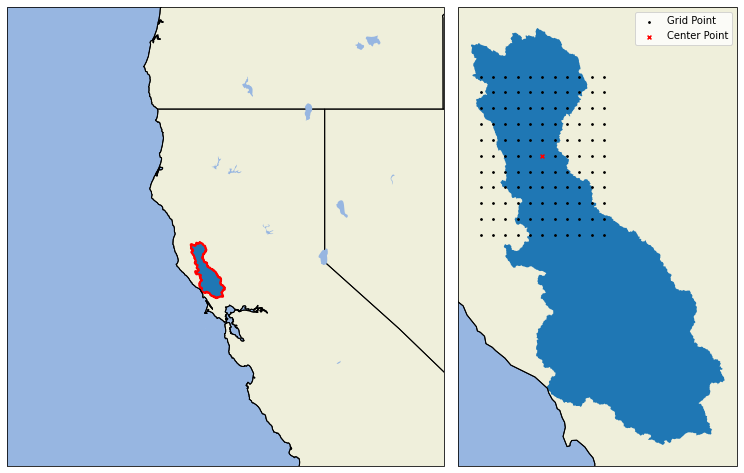

In [29]:
# Define the projection to use
visual_crs = cartopy.crs.PlateCarree()

# Set up the figure layout and relative widths
fig = plt.figure(figsize=(10.5, 6.5))

gs = gridspec.GridSpec(1, 2, width_ratios=[1.6, 1])

axes = [
    plt.subplot(gs[0], projection=visual_crs),
    plt.subplot(gs[1], projection=visual_crs),
]

# Add features
for ax in axes:
  ax.add_feature(cartopy.feature.COASTLINE)
  ax.add_feature(cartopy.feature.STATES)
  ax.add_feature(cartopy.feature.LAND)
  ax.add_feature(cartopy.feature.OCEAN)
  ax.add_feature(cartopy.feature.LAKES)

# The left panel
shp.plot(ax=axes[0], edgecolor='red', linewidth=2)
axes[0].set_xlim(-128, -117)
axes[0].set_ylim(35, 44)

# The right panel
shp.plot(ax=axes[1])
axes[1].scatter(prism.Xs, prism.Ys, s=3, c='black', label='Grid Point')

center_station_index = 60
axes[1].scatter(
    prism.Xs[center_station_index],
    prism.Ys[center_station_index],
    s=15, marker='x', c='red', label='Center Point')
#We are taking an individual pixel - the central point for the analysis below

# for i, (x, y) in enumerate(zip(prism.Xs, prism.Ys)):
#   axes[1].annotate(i, (x, y))

axes[1].legend()

# Adjust margins
fig.subplots_adjust(left=0.01, right=0.99, bottom=0.01, top=0.99, wspace=0.01)
fig.show()

In [30]:
# Generate grid layout
grid = np.array(range(wrf.Xs.size)).reshape(11, 11)[::-1]
Grid.write_matrix('grid.txt', grid, overwrite=True)
print(grid.shape)

# Test read the grid text file
grid = AnEnGrid('grid.txt')
print(grid)

(11, 11)
110,	111,	112,	113,	114,	115,	116,	117,	118,	119,	120
99,	100,	101,	102,	103,	104,	105,	106,	107,	108,	109
88,	89,	90,	91,	92,	93,	94,	95,	96,	97,	98
77,	78,	79,	80,	81,	82,	83,	84,	85,	86,	87
66,	67,	68,	69,	70,	71,	72,	73,	74,	75,	76
55,	56,	57,	58,	59,	60,	61,	62,	63,	64,	65
44,	45,	46,	47,	48,	49,	50,	51,	52,	53,	54
33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43
22,	23,	24,	25,	26,	27,	28,	29,	30,	31,	32
11,	12,	13,	14,	15,	16,	17,	18,	19,	20,	21
0,	1,	2,	3,	4,	5,	6,	7,	8,	9,	10


In [31]:
prism

<xarray.Dataset>
Dimensions:         (num_parameters: 1, num_stations: 121, num_times: 14213)
Coordinates:
  * num_times       (num_times) datetime64[ns] 1981-01-01 ... 2019-11-30
  * num_parameters  (num_parameters) object 'precipitation'
Dimensions without coordinates: num_stations
Data variables:
    ParameterNames  (num_parameters) object ...
    StationNames    (num_stations) object ...
    Xs              (num_stations) float64 ...
    Ys              (num_stations) float64 ...
    Times           (num_times) datetime64[ns] ...
    Data            (num_times, num_stations, num_parameters) float64 ...
Attributes:
    creater:           Weiming Hu
    contact:           weiminghu@ucsd.edu
    time_of_creation:  2022-01-11 21:06:29.713884

In [32]:
wrf

<xarray.Dataset>
Dimensions:         (num_times: 4122, num_stations: 121, num_flts: 4,
                     num_parameters: 20)
Coordinates:
  * num_times       (num_times) datetime64[ns] 1985-12-01 ... 2019-03-31
  * num_stations    (num_stations) int64 507 508 509 510 511 ... 294 295 296 297
  * num_flts        (num_flts) timedelta64[ns] 1 days 2 days 3 days 4 days
  * num_parameters  (num_parameters) object 'p_sfc' 'T_2m' ... 'IWV'
Data variables:
    Data            (num_flts, num_times, num_stations, num_parameters) float32 ...
    Ys              (num_stations) float32 ...
    Xs              (num_stations) float32 ...
    ParameterNames  (num_parameters) object ...
    StationNames    (num_stations) object ...
    Times           (num_times) datetime64[ns] ...
    FLTs            (num_flts) timedelta64[ns] ...
Attributes:
    creater:           Weiming Hu
    contact:           weiminghu@ucsd.edu
    time_of_creation:  2023-01-24 10:36:07.530774

In [35]:
wrf.num_times

<xarray.DataArray 'num_times' (num_times: 4122)>
array(['1985-12-01T00:00:00.000000000', '1985-12-02T00:00:00.000000000',
       '1985-12-03T00:00:00.000000000', ..., '2019-03-29T00:00:00.000000000',
       '2019-03-30T00:00:00.000000000', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * num_times  (num_times) datetime64[ns] 1985-12-01 1985-12-02 ... 2019-03-31

In [33]:
# Select which water year to visualize
water_year = 2013

# Select the lead day of the forecasts
lead_day = timedelta(days=1)

# Determine the water year period
start_date = pd.to_datetime(f'{water_year}1201')
end_date = pd.to_datetime(f'{water_year+1}0401')

# These are the dates to visualize
times_to_visualize = pd.to_datetime(wrf.num_times[
    (start_date <= wrf.num_times) & \
    (wrf.num_times < end_date)])

# Calculate areal daily accumulated precipitation
precip = {
    
    'time': times_to_visualize,
    
    # This is the benefit of having a named dimension
    'wrf': wrf.Data.sel(
        num_times=times_to_visualize,
        num_parameters='precip_bkt',
        num_flts=lead_day).isel(num_stations=center_station_index).compute().data,

    'prism': prism.Data.sel(
        num_times=times_to_visualize + lead_day,
        num_parameters='precipitation').isel(num_stations=center_station_index).compute().data,
}

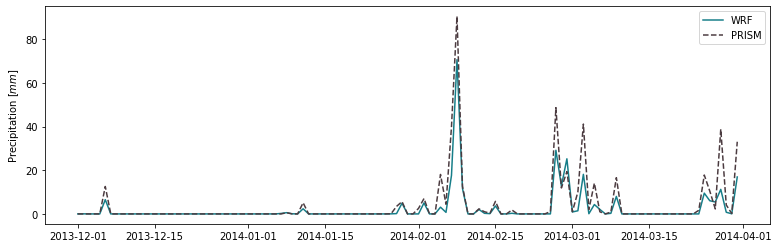

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(13, 4))

for k in ['wrf', 'prism']:
  ax.plot(precip['time'], precip[k],
          label=labels[k], c=colors[k], linestyle=linestyles[k])

ax.legend()
ax.set_ylabel('Precipitation [$mm$]')
fig.show()

## Analog Ensemble

### Generate AnEn Predictions

In [ ]:
!wget -O anen.cfg https://prosecco.geog.psu.edu/data/20230128_WorkshopML/anen.cfg
!wget -O anen_weights.cfg https://prosecco.geog.psu.edu/data/20230128_WorkshopML/anen_weights.cfg

--2023-01-28 15:37:05--  https://prosecco.geog.psu.edu/data/20230128_WorkshopML/anen.cfg
Resolving prosecco.geog.psu.edu (prosecco.geog.psu.edu)... 146.186.149.95, 2610:8:1:dc62:146:186:149:95
Connecting to prosecco.geog.psu.edu (prosecco.geog.psu.edu)|146.186.149.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 389
Saving to: ‘anen.cfg’

anen.cfg            100%[===================>]     389  --.-KB/s    in 0s      

2023-01-28 15:37:05 (97.4 MB/s) - ‘anen.cfg’ saved [389/389]

--2023-01-28 15:37:05--  https://prosecco.geog.psu.edu/data/20230128_WorkshopML/anen_weights.cfg
Resolving prosecco.geog.psu.edu (prosecco.geog.psu.edu)... 146.186.149.95, 2610:8:1:dc62:146:186:149:95
Connecting to prosecco.geog.psu.edu (prosecco.geog.psu.edu)|146.186.149.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 499
Saving to: ‘anen_weights.cfg’

anen_weights.cfg    100%[===================>]     499  --.-KB/s    in 0s      

2023-01-28 15:37:05 (1

In [ ]:
!anen_netcdf -c anen.cfg anen_weights.cfg \
    --search-start "1985/12/01 00:00:00" \
    --search-end "2016/03/31 23:59:59" \
    --test-start "2016/12/01 00:00:00" \
    --test-end "2019/03/31 23:59:59" \
    --fcst-station-start 60 --fcst-station-count 1 \
    --obs-station-start 60 --obs-station-count 1 \
    --out anen.nc

Reading forecast file (/content/data/wrf.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Reading times ...
Updating dimensions for 20 parameters, 1 stations, 4122 times, and 4 lead times ...
Reading variable Data ...
Reading observation file (/content/data/prism.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Updating dimensions ...
Reading variable Data ...
Start AnEnIS generation ...
Computing standard deviation ...
Allocating memory ...
************** AnEn Configuration Summary **************
verbose: 3
num_analogs: 15
num_similarity: 15
observation_id: 0
max_par_nan: 0
max_flt_nan: 0
flt_radius: 1
save_analogs: 1
save_analogs_time_index: 0
save_similarity: 0
save_similarity_time_index: 0
operation: 0
quick: 0
prevent_search_future: 1
no_norm: 0
Use AI similarity: 0
weights: 0,0,0,0,0.1,... [total: 20]
*********** End of AnEn Configuration Summary **********
************** AnEn Computation Summary **************
Number of stations: 1
Numbe

### Verify AnEn

In [ ]:
# Load AnEn and formated forecasts and observations from the output NC file
anen = AnEnIO.open_dataset('anen.nc', decode=True)
wrf = AnEnIO.open_dataset('anen.nc', decode=True, group='Forecasts')
prism = AnEnIO.open_dataset('anen.nc', decode=True, group='AlignedObservations')

In [ ]:
# Create verifiers for WRF and AnEn
verifiers = {
    'wrf': VerifyDeterm(
        f=wrf['Data'].sel(num_parameters='precip_bkt').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'anen': VerifyDeterm(
        f=anen['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
}

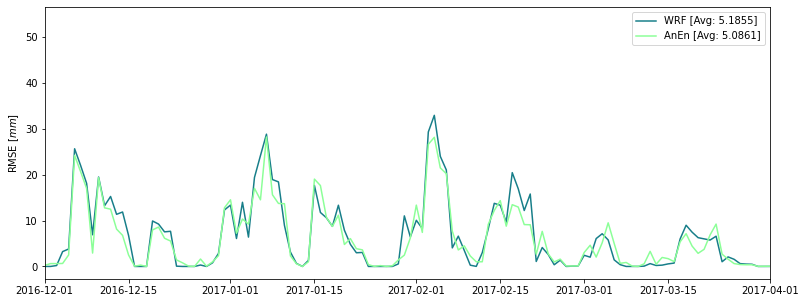

In [ ]:
# Dimensions of verifier data arrays are [lead times, initialization times, stations]
rmse = {k: v.set_avg_axis((0, 2)).rmse() for k, v in verifiers.items()}

# Get the x ticks
datetimes = pd.to_datetime(anen.num_times)

fig, ax = plt.subplots(1, 1, figsize=(13, 5))

for k in rmse:
  ax.plot(datetimes, rmse[k], label=labels[k],
          c=colors[k], linestyle=linestyles[k])

ax.set_xlim(pd.to_datetime('20161201'), pd.to_datetime('20170401'))
ax.set_ylabel('RMSE [$mm$]')
ax.legend()
fig.show()

## Deep Analogs with Neural Networks

In [ ]:
# If you want to train your own model
# First, download the configuration file
# !wget -O da_nn.yaml https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_nn.yaml
# Then, train the model
# !deep_analogs_train da_nn.yaml

# Use a pre-trained model
!mkdir da_nn
!wget -O da_nn/da_nn_pretrained.pt https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_nn_pretrained.pt

--2023-01-27 03:17:55--  https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_nn_pretrained.pt
Resolving prosecco.geog.psu.edu (prosecco.geog.psu.edu)... 146.186.149.95, 2610:8:1:dc62:146:186:149:95
Connecting to prosecco.geog.psu.edu (prosecco.geog.psu.edu)|146.186.149.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48074 (47K)
Saving to: ‘da_nn/da_nn_pretrained.pt’

da_nn/da_nn_pretrai 100%[===================>]  46.95K   104KB/s    in 0.4s    

2023-01-27 03:17:57 (104 KB/s) - ‘da_nn/da_nn_pretrained.pt’ saved [48074/48074]



In [ ]:
!anen_netcdf -c anen.cfg \
    --ai-embedding da_nn/da_nn_pretrained.pt \
    --search-start "1985/12/01 00:00:00" \
    --search-end "2016/03/31 23:59:59" \
    --test-start "2016/12/01 00:00:00" \
    --test-end "2019/03/31 23:59:59" \
    --fcst-station-start 60 --fcst-station-count 1 \
    --obs-station-start 60 --obs-station-count 1 \
    --no-norm -v 3 \
    --out da_nn.nc

Reading forecast file (/content/data/wrf.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Reading times ...
Updating dimensions for 20 parameters, 1 stations, 4122 times, and 4 lead times ...
Reading variable Data ...
Reading observation file (/content/data/prism.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Updating dimensions ...
Reading variable Data ...
Transforming forecasts variables to latent features with AI ...
Reading the embedding model ...
Embedding type is 1: 2-dimensional embedding [parameters, lead times]
Lead time radius for embedding: 1
Populating the tensor with 2-dimensional embeddings (parameters with lead times) ...
Feature transformation complete!
Saving [20] latent features ...
Copying latent feature values ...
Forecast variables have been transformed to latent features!
Initialize weights to all 1s because weights in latent space do not matter!
Start AnEnIS generation ...
Computing standard deviation ...
Allocating me

In [ ]:
# Load AnEn and formated forecasts and observations from the output NC file
anen = AnEnIO.open_dataset('anen.nc', decode=True)
da_nn = AnEnIO.open_dataset('da_nn.nc', decode=True)
wrf = AnEnIO.open_dataset('anen.nc', decode=True, group='Forecasts')
prism = AnEnIO.open_dataset('anen.nc', decode=True, group='AlignedObservations')

In [ ]:
# Create verifiers for WRF and AnEn
verifiers = {
    'wrf': VerifyDeterm(
        f=wrf['Data'].sel(num_parameters='precip_bkt').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'anen': VerifyDeterm(
        f=anen['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'da_nn': VerifyDeterm(
        f=da_nn['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
}

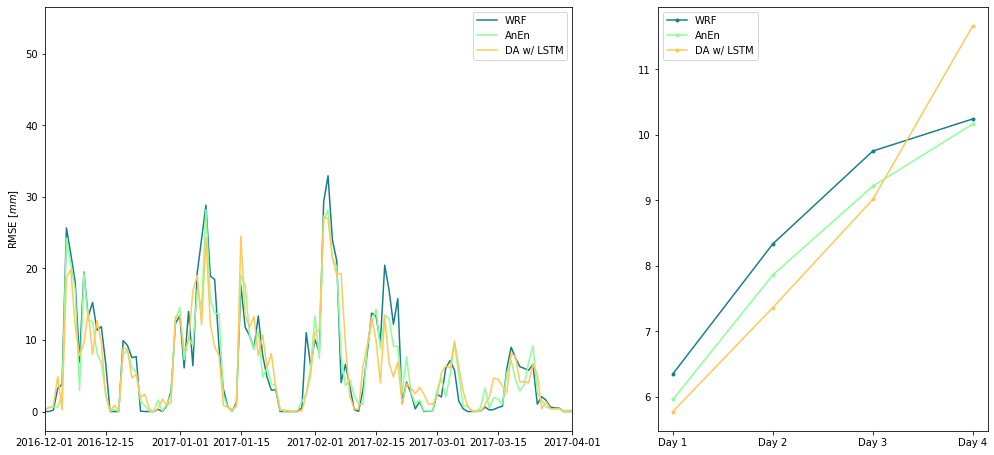

In [ ]:
# Dimensions of verifier data arrays are [lead times, initialization times, stations]
rmse_days = {k: v.set_avg_axis((0, 2)).rmse() for k, v in verifiers.items()}
rmse_leads = {k: v.set_avg_axis((1, 2)).rmse() for k, v in verifiers.items()}

# Get the x ticks
datetimes = pd.to_datetime(anen.num_times)

# Set up the figure layout and relative widths
fig = plt.figure(figsize=(13*1.3, 6*1.3))

gs = gridspec.GridSpec(1, 2, width_ratios=[1.6, 1])

axes = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
]

for k in rmse_days:
  axes[0].plot(datetimes, rmse_days[k], label=labels[k],
               c=colors[k], linestyle=linestyles[k])
  
  axes[1].plot([f'Day {i}' for i in range(1, 5)], rmse_leads[k], marker='.',
               label=labels[k], c=colors[k], linestyle=linestyles[k])

for ax in axes:
  ax.legend()

axes[0].set_xlim(pd.to_datetime('20161201'), pd.to_datetime('20170401'))
axes[0].set_ylabel('RMSE [$mm$]')
fig.show()

## Deep Analogs with Conv-LSTM

In [ ]:
# If you want to train your own model
# First, download the configuration file
# !wget -O da_convlstm.yaml https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_convlstm.yaml
# Then, train the model
# !PYTHONPATH=/content/AnalogsEnsemble-master/build/CGrid deep_analogs_train da_convlstm.yaml

# Use a pre-trained model
!mkdir da_convlstm
!wget -O da_convlstm/da_convlstm_pretrained.pt https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_convlstm_pretrained.pt

--2023-01-28 15:37:24--  https://prosecco.geog.psu.edu/data/20230128_WorkshopML/da_convlstm_pretrained.pt
Resolving prosecco.geog.psu.edu (prosecco.geog.psu.edu)... 146.186.149.95, 2610:8:1:dc62:146:186:149:95
Connecting to prosecco.geog.psu.edu (prosecco.geog.psu.edu)|146.186.149.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 401473 (392K)
Saving to: ‘da_convlstm/da_convlstm_pretrained.pt’

da_convlstm/da_conv 100%[===================>] 392.06K  1.45MB/s    in 0.3s    

2023-01-28 15:37:25 (1.45 MB/s) - ‘da_convlstm/da_convlstm_pretrained.pt’ saved [401473/401473]



In [ ]:
!anen_transform --forecast-file data/wrf.nc \
    --ai-embedding da_convlstm/da_convlstm_pretrained.pt \
    --out data/wrf_da_convlstm.nc \
    --grid-file grid.txt \
    --overwrite -v 3

Reading forecast file (data/wrf.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Reading times ...
Updating dimensions for 20 parameters, 121 stations, 4122 times, and 4 lead times ...
Reading variable Data ...
Reading grid from grid.txt
Grid summary: 11 rows, 11 columns, 121 station keys, and 0 unassigned grids (nan)
110,	111,	112,	113,	114,	115,	116,	117,	118,	119,	120
99,	100,	101,	102,	103,	104,	105,	106,	107,	108,	109
88,	89,	90,	91,	92,	93,	94,	95,	96,	97,	98
77,	78,	79,	80,	81,	82,	83,	84,	85,	86,	87
66,	67,	68,	69,	70,	71,	72,	73,	74,	75,	76
55,	56,	57,	58,	59,	60,	61,	62,	63,	64,	65
44,	45,	46,	47,	48,	49,	50,	51,	52,	53,	54
33,	34,	35,	36,	37,	38,	39,	40,	41,	42,	43
22,	23,	24,	25,	26,	27,	28,	29,	30,	31,	32
11,	12,	13,	14,	15,	16,	17,	18,	19,	20,	21
0,	1,	2,	3,	4,	5,	6,	7,	8,	9,	10
Reading the embedding model ...
Embedding type is 2: 3-dimensional embedding [parameters, stations, lead times]
Lead time radius for embedding: 1
Populating the tensor with 3-

In [ ]:
!anen_netcdf -c anen.cfg \
    --forecast-file data/wrf_da_convlstm.nc \
    --fcst-station-start 60 --fcst-station-count 1 \
    --obs-station-start 60 --obs-station-count 1 \
    --search-start "1985/12/01 00:00:00" \
    --search-end "2016/03/31 23:59:59" \
    --test-start "2016/12/01 00:00:00" \
    --test-end "2019/03/31 23:59:59" \
    --no-norm \
    --out da_convlstm.nc

Reading forecast file (/content/data/wrf_da_convlstm.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Reading times ...
Updating dimensions for 40 parameters, 1 stations, 4122 times, and 4 lead times ...
Reading variable Data ...
Reading observation file (/content/data/prism.nc) ...
Reading parameters ...
Reading stations ...
Reading times ...
Updating dimensions ...
Reading variable Data ...
Start AnEnIS generation ...
Computing standard deviation ...
Allocating memory ...
************** AnEn Configuration Summary **************
verbose: 3
num_analogs: 15
num_similarity: 15
observation_id: 0
max_par_nan: 0
max_flt_nan: 0
flt_radius: 1
save_analogs: 1
save_analogs_time_index: 0
save_similarity: 0
save_similarity_time_index: 0
operation: 0
quick: 0
prevent_search_future: 1
no_norm: 1
Use AI similarity: 0
weights: 1,1,1,1,1,... [total: 40]
*********** End of AnEn Configuration Summary **********
************** AnEn Computation Summary **************
Number of station

In [ ]:
# Load AnEn and formated forecasts and observations from the output NC file
anen = AnEnIO.open_dataset('anen.nc', decode=True)
da_nn = AnEnIO.open_dataset('da_nn.nc', decode=True)
da_convlstm = AnEnIO.open_dataset('da_convlstm.nc', decode=True)
wrf = AnEnIO.open_dataset('anen.nc', decode=True, group='Forecasts')
prism = AnEnIO.open_dataset('anen.nc', decode=True, group='AlignedObservations')

In [ ]:
# Create verifiers for WRF and AnEn
verifiers = {
    'wrf': VerifyDeterm(
        f=wrf['Data'].sel(num_parameters='precip_bkt').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'anen': VerifyDeterm(
        f=anen['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'da_nn': VerifyDeterm(
        f=da_nn['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
    'da_convlstm': VerifyDeterm(
        f=da_convlstm['analogs'].mean('num_analogs').data,
        o=prism['Data'].sel(num_parameters='precipitation').data),
}

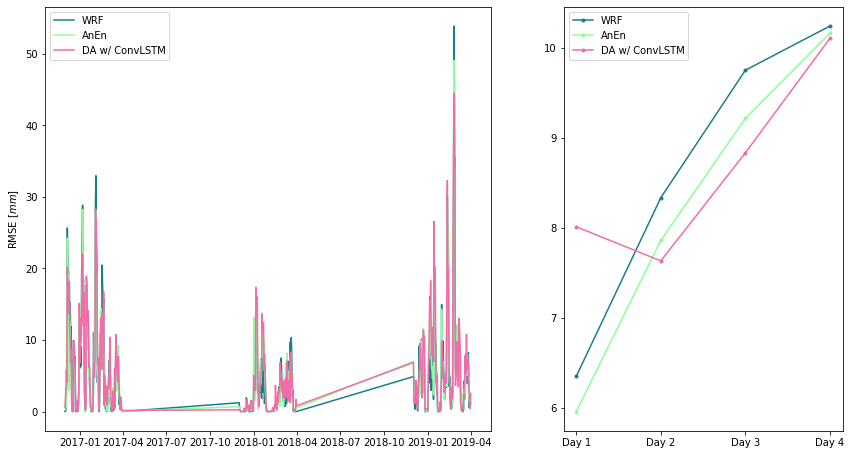

In [ ]:
# Dimensions of verifier data arrays are [lead times, initialization times, stations]
rmse_days = {k: v.set_avg_axis((0, 2)).rmse() for k, v in verifiers.items()}
rmse_leads = {k: v.set_avg_axis((1, 2)).rmse() for k, v in verifiers.items()}

# Get the x ticks
datetimes = pd.to_datetime(anen.num_times)

# Set up the figure layout and relative widths
fig = plt.figure(figsize=(11*1.3, 6*1.3))

gs = gridspec.GridSpec(1, 2, width_ratios=[1.6, 1])

axes = [
    plt.subplot(gs[0]),
    plt.subplot(gs[1]),
]

for k in rmse_days:
  axes[0].plot(datetimes, rmse_days[k], label=labels[k],
               c=colors[k], linestyle=linestyles[k])
  
  axes[1].plot([f'Day {i}' for i in range(1, 5)], rmse_leads[k], marker='.',
               label=labels[k], c=colors[k], linestyle=linestyles[k])

for ax in axes:
  ax.legend()

axes[0].set_ylabel('RMSE [$mm$]')

fig.show()

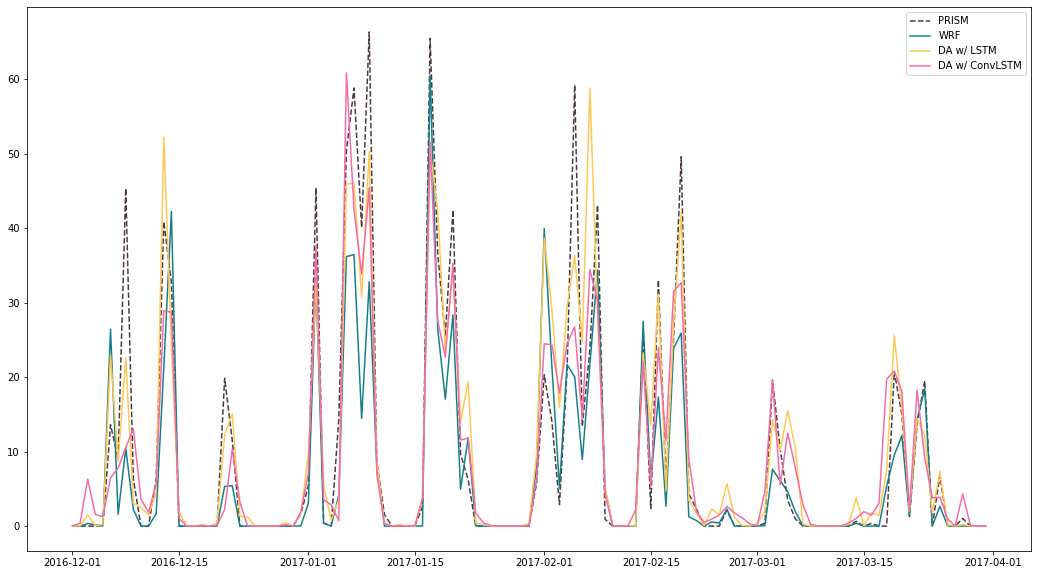

In [ ]:
lead_time = 1

mask = (pd.to_datetime('2016/12/01') <= da_nn['num_times']) & \
       (da_nn['num_times'] < pd.to_datetime('2017/04/01'))

ts = {
    'time': da_nn['num_times'][mask],
    'prism': prism['Data'].sel(num_parameters='precipitation', num_times=mask).squeeze('num_stations').isel(num_flts=lead_time),
    'wrf': wrf['Data'].sel(num_parameters='precip_bkt', num_times=mask).squeeze('num_stations').isel(num_flts=lead_time),
    'da_nn': da_nn['analogs'].sel(num_times=mask).isel(num_flts=lead_time).mean('num_analogs').squeeze('num_stations'),
    'da_convlstm': da_convlstm['analogs'].sel(num_times=mask).isel(num_flts=lead_time).mean('num_analogs').squeeze('num_stations'),
}


n_members = 10
fig, ax = plt.subplots(1, 1, figsize=(18, 10))

for k in ['prism', 'wrf', 'da_nn', 'da_convlstm']:
  ax.plot(ts['time'], ts[k], label=labels[k],
          c=colors[k], linestyle=linestyles[k])

ax.legend()
fig.show()